In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving adult 3.csv to adult 3.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['adult 3.csv']))
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['income'].classes_))


Accuracy: 0.8078496406854616

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      6842
        >50K       0.68      0.40      0.50      2203

    accuracy                           0.81      9045
   macro avg       0.75      0.67      0.69      9045
weighted avg       0.79      0.81      0.79      9045



In [ ]:
import numpy as np

def predict_income():
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ").strip()
    education = input("Education (e.g., Bachelors, HS-grad): ").strip()
    workclass = input("Workclass (e.g., Private, State-gov): ").strip()

    default_values = {
        'fnlwgt': 189000,
        'educational-num': 10,
        'marital-status': 'Never-married',
        'occupation': 'Adm-clerical',
        'relationship': 'Not-in-family',
        'race': 'White',
        'capital-gain': 0,
        'capital-loss': 0,
        'hours-per-week': 40,
        'native-country': 'United-States'
    }

    def encode(col, val):
        try:
            all_classes = label_encoders[col].classes_
            match = next(item for item in all_classes if item.lower() == val.strip().lower())
            return label_encoders[col].transform([match])[0]
        except:
            print(f"⚠️ '{val}' not found in training data for '{col}'. Using default. Try one of: {list(all_classes)}")
            return 0

    input_data = [[
        age,
        encode('workclass', workclass),
        default_values['fnlwgt'],
        encode('education', education),
        default_values['educational-num'],
        encode('marital-status', default_values['marital-status']),
        encode('occupation', default_values['occupation']),
        encode('relationship', default_values['relationship']),
        encode('race', default_values['race']),
        encode('gender', gender),
        default_values['capital-gain'],
        default_values['capital-loss'],
        default_values['hours-per-week'],
        encode('native-country', default_values['native-country'])
    ]]

    prediction = model.predict(np.array(input_data))[0]
    result = label_encoders['income'].inverse_transform([prediction])[0]

    print(f"\n💰 Predicted Income Category: {result}")

    # Search for similar records
    gender_encoded = encode('gender', gender)
    education_encoded = encode('education', education)
    workclass_encoded = encode('workclass', workclass)

    matching_rows = df[
        (df['age'] == age) &
        (df['gender'] == gender_encoded) &
        (df['education'] == education_encoded) &
        (df['workclass'] == workclass_encoded)
    ]

    sample_count = min(7, len(matching_rows))
    if sample_count >= 1:
        print(f"\n📋 {sample_count} similar records from dataset:")
        display(matching_rows.sample(sample_count))
    else:
        print("\n⚠️ No similar records found in the dataset.")


In [ ]:
predict_income()


Age: 56
Gender (Male/Female): male
Education (e.g., Bachelors, HS-grad): bachelors
Workclass (e.g., Private, State-gov): Private

💰 Predicted Income Category: <=50K

📋 7 similar records from dataset:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32161,56,2,345730,9,13,2,9,0,4,1,0,0,45,38,1
26467,56,2,295067,9,13,4,3,1,4,1,14084,0,45,38,1
20972,56,2,231232,9,13,2,0,0,4,1,0,0,30,1,0
46387,56,2,125000,9,13,2,0,0,4,1,0,0,40,38,1
28886,56,2,212864,9,13,2,9,0,4,1,0,0,40,38,1
6397,56,2,94345,9,13,2,11,0,4,1,0,0,40,38,1
36362,56,2,105363,9,13,2,3,0,4,1,4508,0,40,38,0


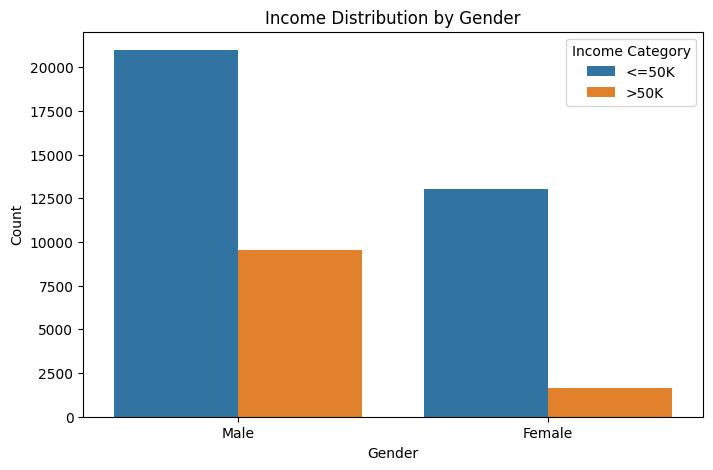

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Decode encoded values
df_plot = df.copy()
df_plot['gender'] = label_encoders['gender'].inverse_transform(df_plot['gender'])
df_plot['income'] = label_encoders['income'].inverse_transform(df_plot['income'])

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df_plot, x='gender', hue='income')
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Income Category")
plt.show()


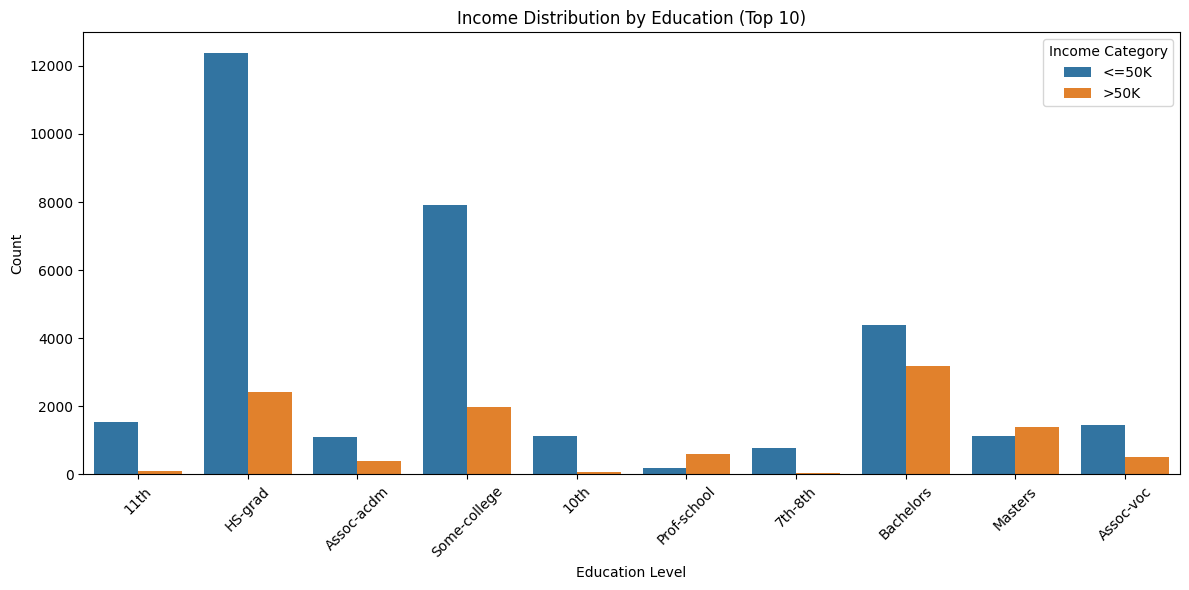

In [ ]:
df_plot['education'] = label_encoders['education'].inverse_transform(df_plot['education'])
top_educations = df_plot['education'].value_counts().nlargest(10).index
df_top_edu = df_plot[df_plot['education'].isin(top_educations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_edu, x='education', hue='income')
plt.title("Income Distribution by Education (Top 10)")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income Category")
plt.tight_layout()
plt.show()


In [ ]:
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


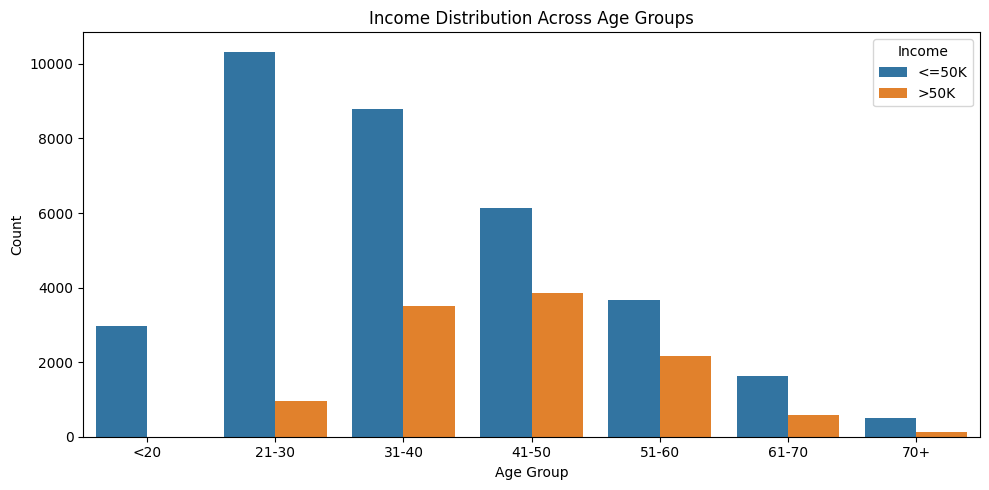

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df.copy()
df_plot['income'] = label_encoders['income'].inverse_transform(df_plot['income'])

df_plot['age_group'] = pd.cut(df_plot['age'], bins=[0, 20, 30, 40, 50, 60, 70, 100],
                              labels=['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'])

plt.figure(figsize=(10, 5))
sns.countplot(data=df_plot, x='age_group', hue='income')
plt.title("Income Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Income")
plt.tight_layout()
plt.show()


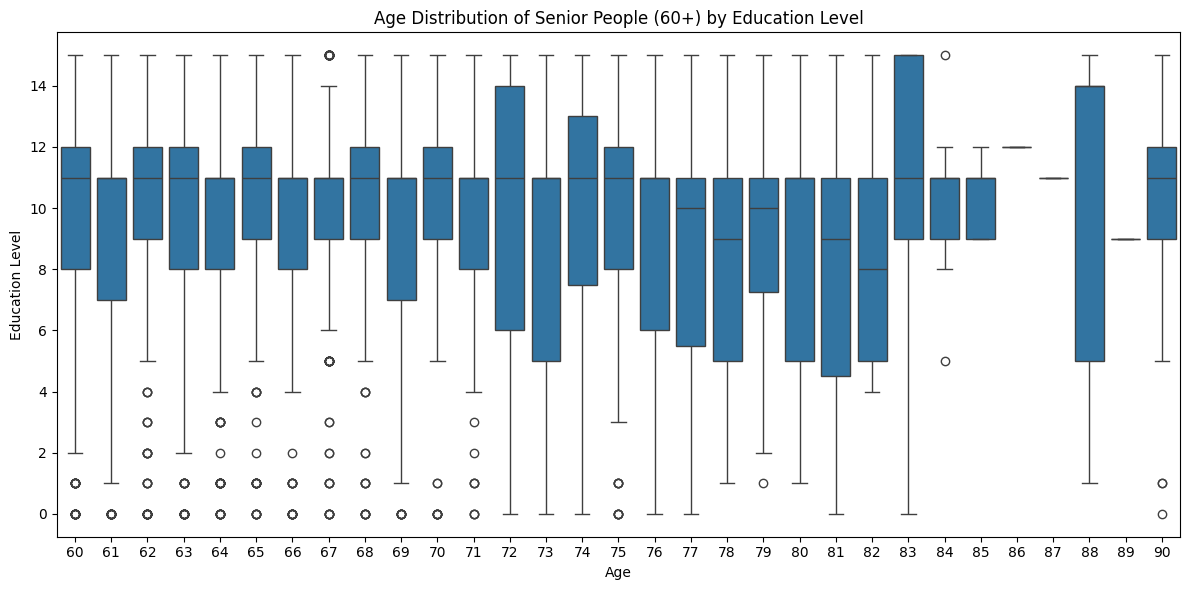

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only senior people (age >= 60)
senior_df = df[df['age'] >= 60]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(y='education', x='age', data=senior_df)
plt.title("Age Distribution of Senior People (60+) by Education Level")
plt.xlabel("Age")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


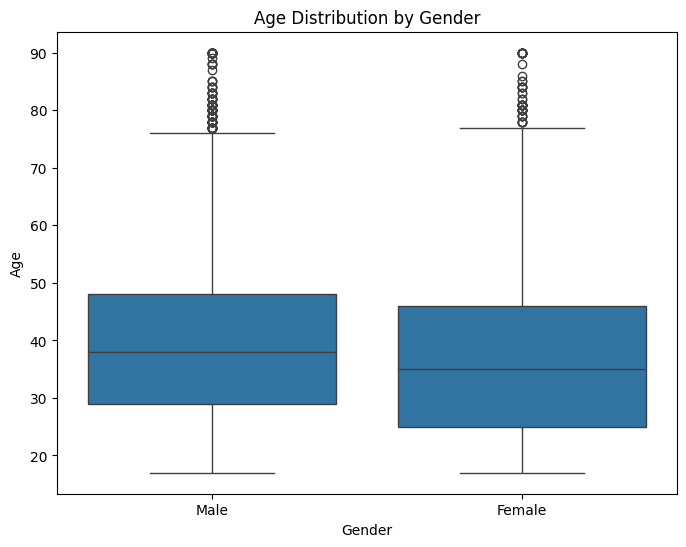

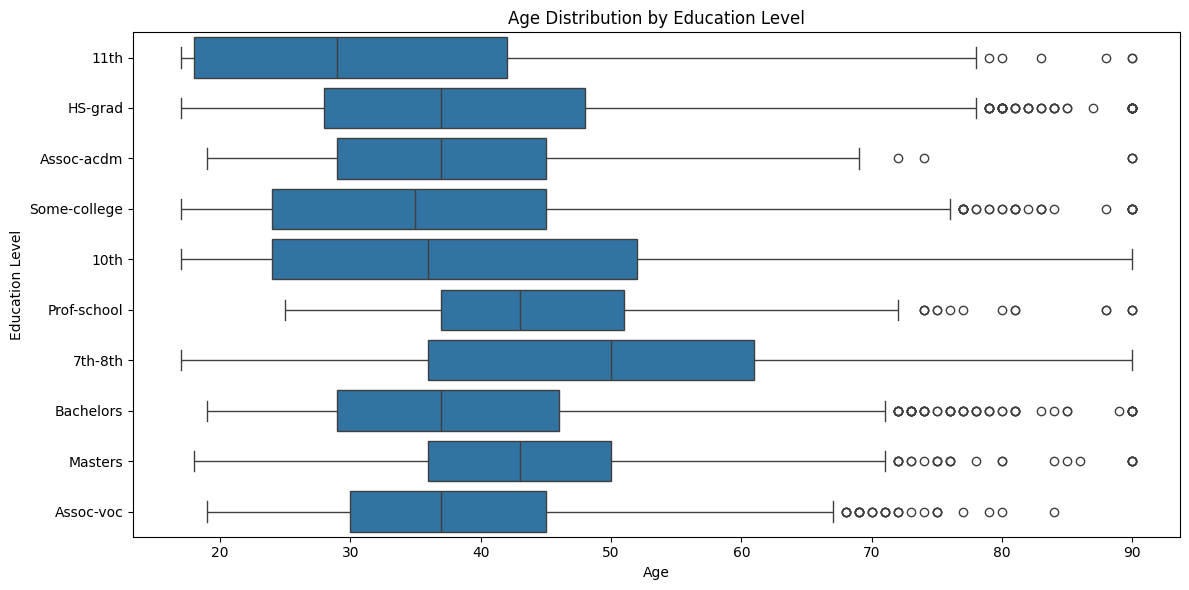

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Decode labels for plotting
df_plot = df.copy()
df_plot['gender'] = label_encoders['gender'].inverse_transform(df_plot['gender'])

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df_plot)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


df_plot['education'] = label_encoders['education'].inverse_transform(df_plot['education'])

top_edu = df_plot['education'].value_counts().nlargest(10).index
df_top_edu = df_plot[df_plot['education'].isin(top_edu)]

plt.figure(figsize=(12, 6))
sns.boxplot(y='education', x='age', data=df_top_edu)
plt.title("Age Distribution by Education Level")
plt.xlabel("Age")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


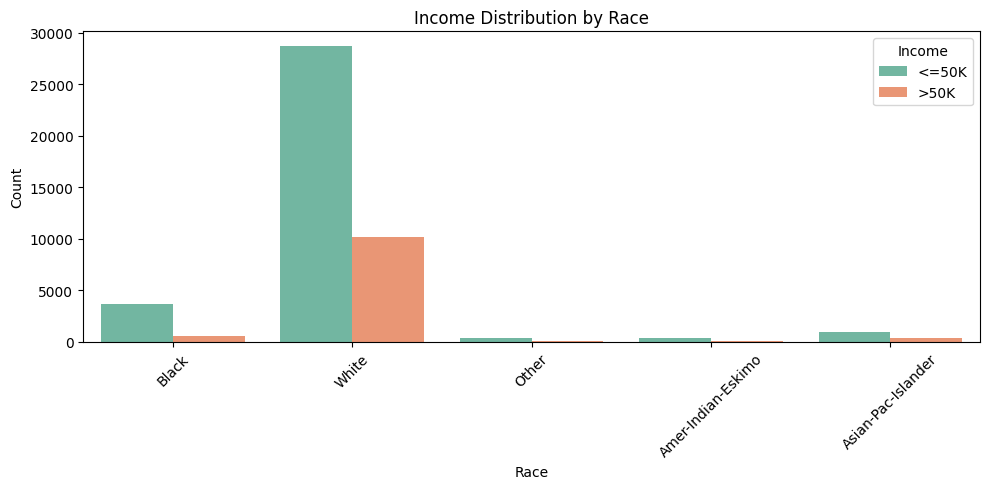

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy to decode labels
df_race = df.copy()

# Decode race and income columns
df_race['race'] = label_encoders['race'].inverse_transform(df_race['race'])
df_race['income'] = label_encoders['income'].inverse_transform(df_race['income'])

# Plot: Income distribution by race
plt.figure(figsize=(10, 5))
sns.countplot(data=df_race, x='race', hue='income', palette='Set2')
plt.title("Income Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.tight_layout()
plt.show()


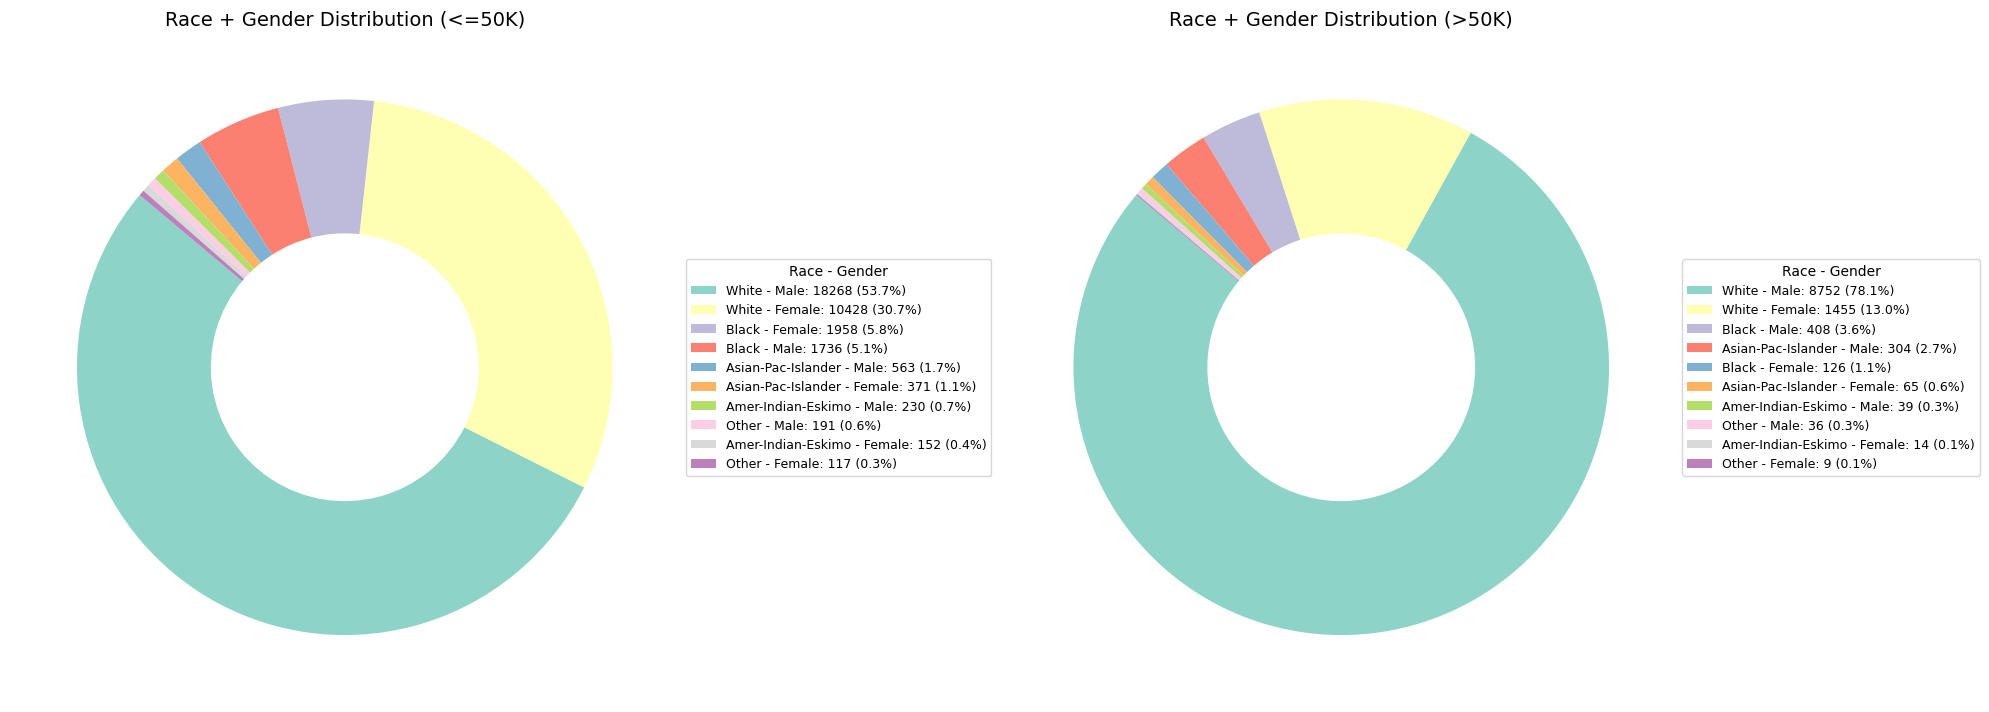


📊 Detailed Breakdown for <=50K:
  White - Male: 18268 people (53.7%)
  White - Female: 10428 people (30.7%)
  Black - Female: 1958 people (5.8%)
  Black - Male: 1736 people (5.1%)
  Asian-Pac-Islander - Male: 563 people (1.7%)
  Asian-Pac-Islander - Female: 371 people (1.1%)
  Amer-Indian-Eskimo - Male: 230 people (0.7%)
  Other - Male: 191 people (0.6%)
  Amer-Indian-Eskimo - Female: 152 people (0.4%)
  Other - Female: 117 people (0.3%)

📊 Detailed Breakdown for >50K:
  White - Male: 8752 people (78.1%)
  White - Female: 1455 people (13.0%)
  Black - Male: 408 people (3.6%)
  Asian-Pac-Islander - Male: 304 people (2.7%)
  Black - Female: 126 people (1.1%)
  Asian-Pac-Islander - Female: 65 people (0.6%)
  Amer-Indian-Eskimo - Male: 39 people (0.3%)
  Other - Male: 36 people (0.3%)
  Amer-Indian-Eskimo - Female: 14 people (0.1%)
  Other - Female: 9 people (0.1%)


In [ ]:
import matplotlib.pyplot as plt

low_total = low_counts.sum()
high_total = high_counts.sum()
def make_legend_labels(counts, total):
    return [f"{label}: {count} ({(count / total * 100):.1f}%)" for label, count in counts.items()]

colors = plt.cm.Set3.colors

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

wedges1, _ = axs[0].pie(
    low_counts,
    labels=None,
    startangle=140,
    colors=colors[:len(low_counts)],
    wedgeprops=dict(width=0.5)
)
axs[0].legend(
    wedges1,
    make_legend_labels(low_counts, low_total),
    title="Race - Gender",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=9
)
axs[0].set_title('Race + Gender Distribution (<=50K)', fontsize=14)

wedges2, _ = axs[1].pie(
    high_counts,
    labels=None,
    startangle=140,
    colors=colors[:len(high_counts)],
    wedgeprops=dict(width=0.5)
)
axs[1].legend(
    wedges2,
    make_legend_labels(high_counts, high_total),
    title="Race - Gender",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=9
)
axs[1].set_title('Race + Gender Distribution (>50K)', fontsize=14)

plt.tight_layout()
plt.show()


print("\n📊 Detailed Breakdown for <=50K:")
for label, count in low_counts.items():
    percentage = (count / low_total) * 100
    print(f"  {label}: {count} people ({percentage:.1f}%)")

print("\n📊 Detailed Breakdown for >50K:")
for label, count in high_counts.items():
    percentage = (count / high_total) * 100
    print(f"  {label}: {count} people ({percentage:.1f}%)")

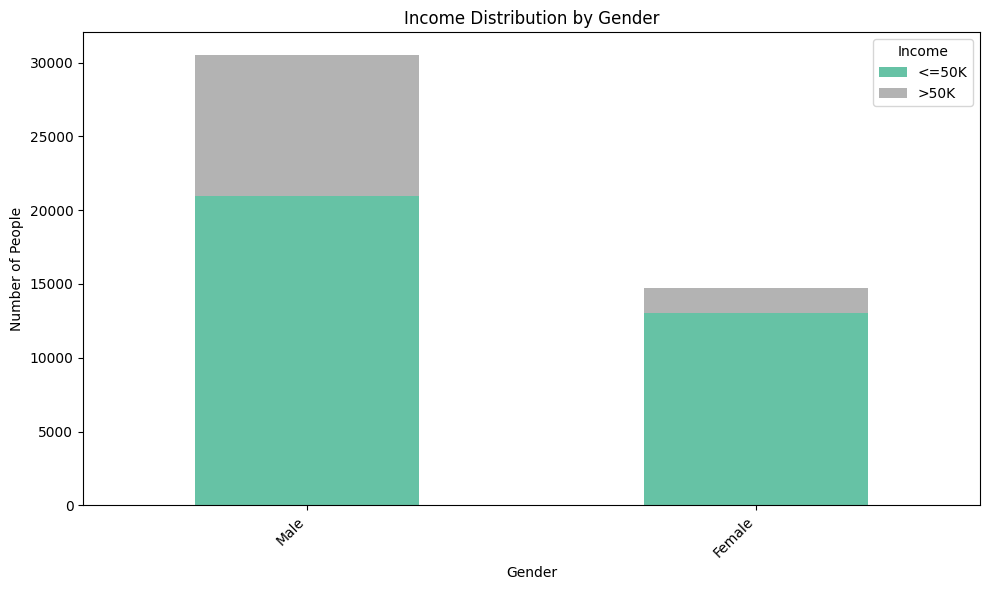

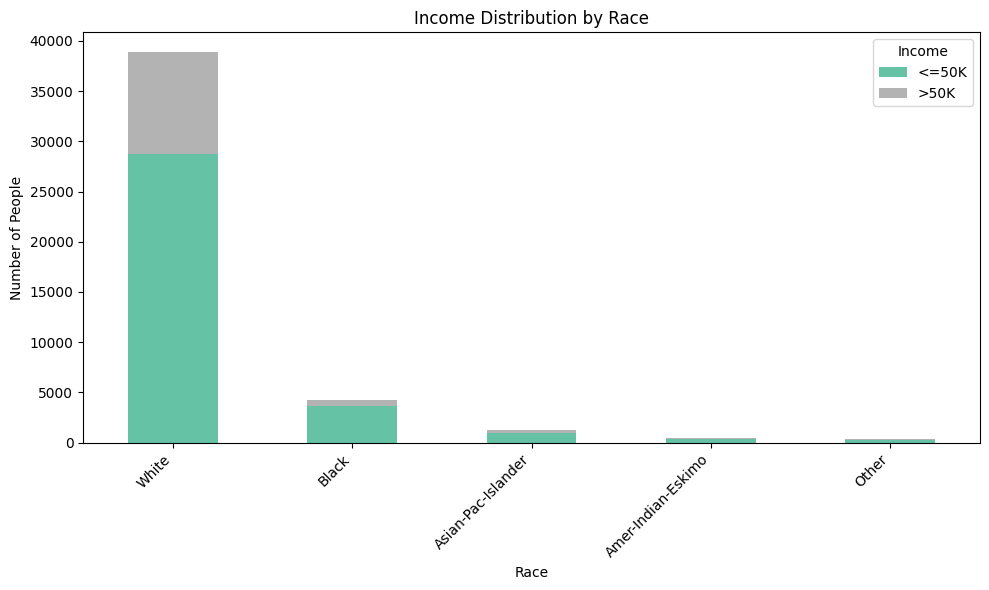

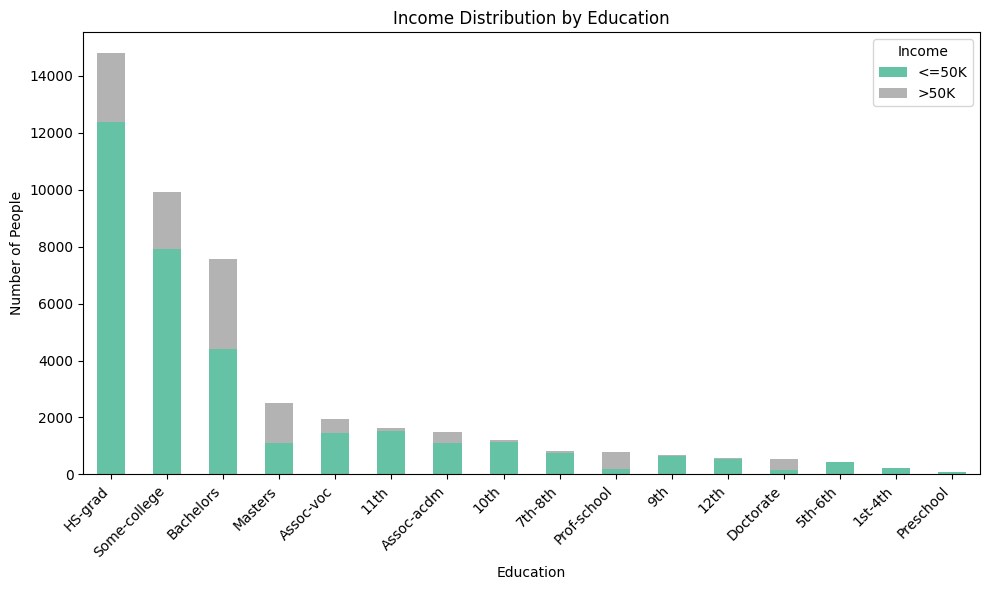

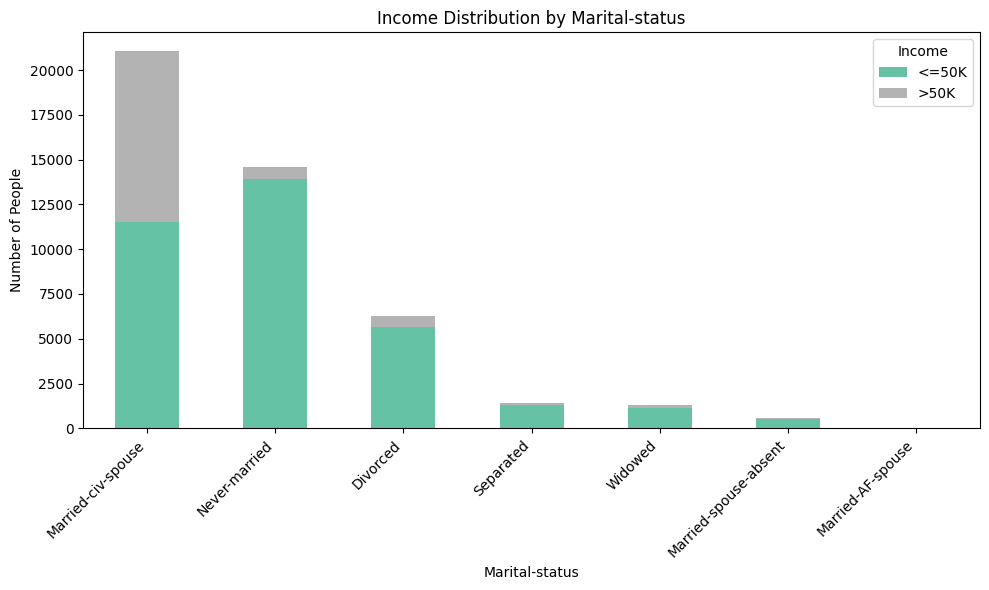

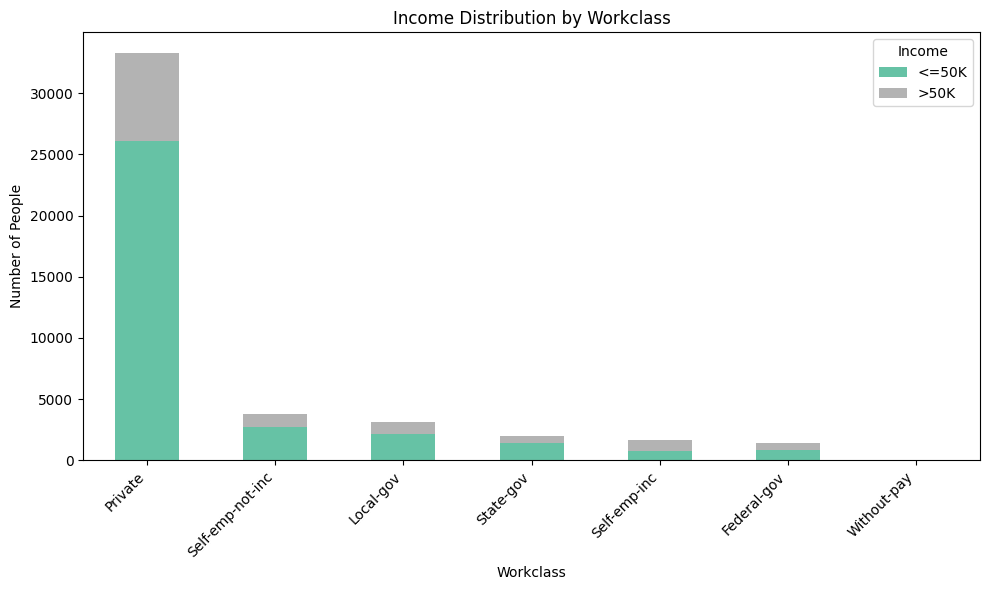

In [ ]:
import matplotlib.pyplot as plt

df_bar = df.copy()
df_bar['income'] = label_encoders['income'].inverse_transform(df_bar['income'])
df_bar['gender'] = label_encoders['gender'].inverse_transform(df_bar['gender'])
df_bar['race'] = label_encoders['race'].inverse_transform(df_bar['race'])
df_bar['education'] = label_encoders['education'].inverse_transform(df_bar['education'])
df_bar['marital-status'] = label_encoders['marital-status'].inverse_transform(df_bar['marital-status'])
df_bar['workclass'] = label_encoders['workclass'].inverse_transform(df_bar['workclass'])


categorical_cols = ['gender', 'race', 'education', 'marital-status', 'workclass']

for col in categorical_cols:
    group = df_bar.groupby([col, 'income']).size().unstack(fill_value=0)

    group = group.loc[group.sum(axis=1).sort_values(ascending=False).index]

    group.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
    plt.title(f"Income Distribution by {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Number of People")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Income')
    plt.tight_layout()
    plt.show()


In [ ]:
predict_income()

Age: 56
Gender (Male/Female): Male
Education (e.g., Bachelors, HS-grad): bachelors
Workclass (e.g., Private, State-gov): private

💰 Predicted Income Category: <=50K

📋 7 similar records from dataset:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1758,56,2,133876,9,13,2,9,0,4,1,0,0,40,38,1
19592,56,2,155449,9,13,2,9,0,4,1,0,0,50,38,0
36362,56,2,105363,9,13,2,3,0,4,1,4508,0,40,38,0
6397,56,2,94345,9,13,2,11,0,4,1,0,0,40,38,1
25297,56,2,132026,9,13,2,11,0,2,1,7688,0,45,38,1
32542,56,2,161662,9,13,2,3,0,4,1,0,0,42,38,1
16155,56,2,174864,9,13,0,3,4,4,1,0,0,45,38,1


In [ ]:
predict_income()


Age: 45
Gender (Male/Female): male
Education (e.g., Bachelors, HS-grad): bachelors
Workclass (e.g., Private, State-gov): private

💰 Predicted Income Category: <=50K

📋 7 similar records from dataset:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
47171,45,2,34127,9,13,2,9,0,4,1,0,0,50,38,1
396,45,2,355781,9,13,2,3,0,1,1,0,0,45,23,1
4602,45,2,253827,9,13,2,2,0,4,1,7688,0,40,38,1
18351,45,2,371886,9,13,4,9,1,4,1,0,0,46,38,0
45707,45,2,30457,9,13,2,3,0,4,1,15024,0,40,38,1
40409,45,2,242391,9,13,2,3,0,4,1,0,0,60,38,1
5812,45,2,120121,9,13,2,11,0,4,1,0,0,50,38,0
